# K-Means Algorithm

* The code below demonstrates the use of the k-means algorithm.
* K-Means is a part of unsupervised machine learning and thus there is no training and testing data.
* K-Means helps forming clusters of the dataset and getting useful insights.

## Implementation in Python

The lits of python packages used for data analysis:

In [1]:
import pandas as pd
from sklearn import cluster

The protein.csv dataset is present in the data folder.

In [2]:
food = pd.read_csv('./data/protein.csv')

A preview of the imported dataset:

In [3]:
head = int(raw_input("To display first N rows, enter N: "))
food.head(head)

To display first N rows, enter N: 6


,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4


Displaying Summary statisitcs of all the numeric variables in the dataset. Nulls values are handled automatically.

In [4]:
food.describe(percentiles=True)

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,9.828000,7.896000,2.936000,17.112000,4.284000,32.248000,4.276000,3.072000,4.136000
std,3.347078,3.694081,1.117617,7.105416,3.402533,10.974786,1.634085,1.985682,1.803903
min,4.400000,1.400000,0.500000,4.900000,0.200000,18.600000,0.600000,0.700000,1.400000
50%,9.500000,7.800000,2.900000,17.600000,3.400000,28.000000,4.700000,2.400000,3.800000
100%,18.000000,14.000000,4.700000,33.700000,14.200000,56.700000,6.500000,7.800000,7.900000
max,18.000000,14.000000,4.700000,33.700000,14.200000,56.700000,6.500000,7.800000,7.900000


A scatter plot matrix of all the numeric varibles.

Populating the interactive namespace from numpy and matplotlib


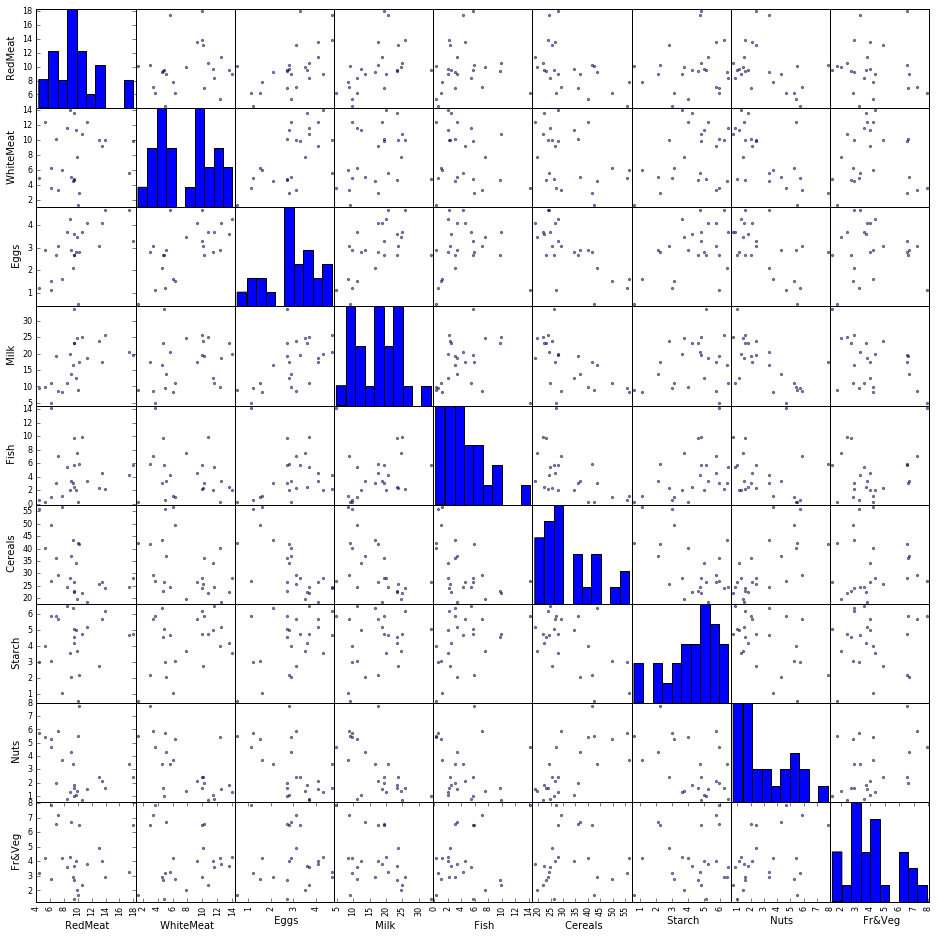

In [5]:
%pylab inline

axes = pd.tools.plotting.scatter_matrix(food, alpha=0.5, figsize=(16, 16))

Dropping the **Country** column (categorical) to fit K-Means to the dataset. Also, converting the dataset to a numpy array matrix.

In [6]:
train = food.drop('Country', axis = 1) 
print "Dataset type before conversion: ", type(train)

std_data = train.as_matrix()
print "\nDataset type after conversion: ", type(std_data)
print "\n", std_data

Dataset type before conversion:  <class 'pandas.core.frame.DataFrame'>

Dataset type after conversion:  <type 'numpy.ndarray'>

[[ 10.1   1.4   0.5   8.9   0.2  42.3   0.6   5.5   1.7]
 [  8.9  14.    4.3  19.9   2.1  28.    3.6   1.3   4.3]
 [ 13.5   9.3   4.1  17.5   4.5  26.6   5.7   2.1   4. ]
 [  7.8   6.    1.6   8.3   1.2  56.7   1.1   3.7   4.2]
 [  9.7  11.4   2.8  12.5   2.   34.3   5.    1.1   4. ]
 [ 10.6  10.8   3.7  25.    9.9  21.9   4.8   0.7   2.4]
 [  8.4  11.6   3.7  11.1   5.4  24.6   6.5   0.8   3.6]
 [  9.5   4.9   2.7  33.7   5.8  26.3   5.1   1.    1.4]
 [ 18.    9.9   3.3  19.5   5.7  28.1   4.8   2.4   6.5]
 [ 10.2   3.    2.8  17.6   5.9  41.7   2.2   7.8   6.5]
 [  5.3  12.4   2.9   9.7   0.3  40.1   4.    5.4   4.2]
 [ 13.9  10.    4.7  25.8   2.2  24.    6.2   1.6   2.9]
 [  9.    5.1   2.9  13.7   3.4  36.8   2.1   4.3   6.7]
 [  9.5  13.6   3.6  23.4   2.5  22.4   4.2   1.8   3.7]
 [  9.4   4.7   2.7  23.3   9.7  23.    4.6   1.6   2.7]
 [  6.9  10.2   2

Running the k-means algorithm on the dataset. The dataset is divided into 7 clusters. For n_init = 10, the k-means algorithm runs 10 times for 10 random starting points and returns the optimal k-means solution. This parameter is mentioned because k-means can deliver different results if the starting centroid positions get changed.

In [7]:
k = 7
kmeans = cluster.KMeans(n_clusters=k, n_init=10)
kmeans.fit(std_data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=7, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

Checking the model details, specifically the **labels** (the cluster in which the data point resides), the **centroid** (the mean of the cluster) and **interia** (Sum of distances of samples to their closest cluster center.)

In [8]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

print "The final clustering arrangement of the data for each observation: "
print labels

print "\nThe centers of the clusters: "
print centroids

print "\nSum of the distances of samples to their closest cluster center: "
print inertia

The final clustering arrangement of the data for each observation: 
[1 0 3 4 6 5 0 5 3 1 6 5 6 0 5 6 2 4 2 5 3 3 1 0 4]

The centers of the clusters: 
[[  9.55        12.925        3.925       18.3          3.35        23.4
    4.875        1.35         3.85      ]
 [  9.86666667   3.           1.8         14.36666667   3.03333333
   42.53333333   3.06666667   5.56666667   3.7       ]
 [  6.65         3.55         2.1          6.75        10.6         28.1
    5.8          5.3          7.55      ]
 [ 15.5          8.75         3.8         20.35         4.2         26.15
    4.5          2.575        4.675     ]
 [  6.13333333   5.76666667   1.43333333   9.63333333   0.93333333
   54.06666667   2.4          4.9          3.4       ]
 [ 10.66         7.64         3.46        26.5          7.02        22.94
    4.88         1.26         2.28      ]
 [  7.725        9.775        2.825       13.8          2.175       36.825
    4.25         3.2          5.375     ]]

Sum of the distances of 

Ordering the countries accroding to clusters for better interpretation of protein consumption.

In [9]:
food_clustered = food.copy()
food_clustered['Cluster Class'] = pd.Series(labels, index=food_clustered.index)
food_clustered

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,Cluster Class
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,1
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,0
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,3
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,4
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,6
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4,5
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6,0
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4,5
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5,3
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5,1


**Interpretation**: Albania, Bulgaria, Romania, Yugoslavia have similar protien consumption for the mentioned products since they fall in the same cluster.

Plotting the ReadMeat vs WhiteMeat protein consumption of the countries and thier cluster centres.

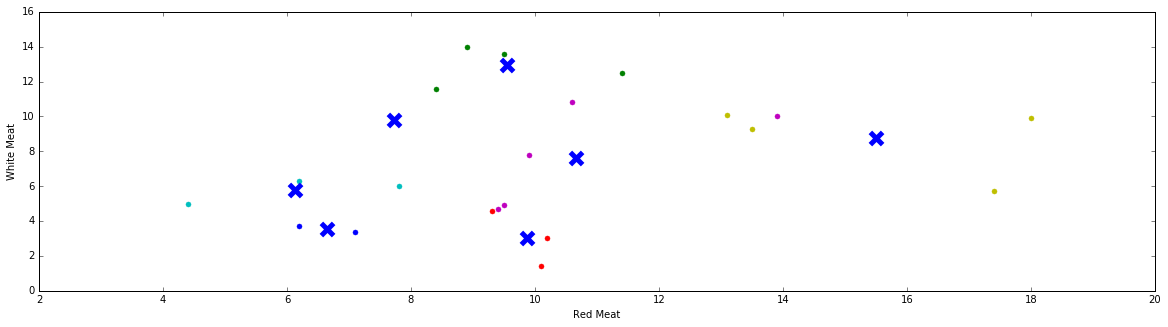

In [10]:
colors = ["g.","r.","b.","y.","c.","m.","Turquoise"]
fig = plt.figure(figsize=(20,5))

#color_m[labels[1]],
for i in range(len(std_data)):
    plt.plot(std_data[i][0], std_data[i][1], colors[labels[i]],  markersize = 10)

plt.scatter(centroids[:,0], centroids[:,1], marker = "x", s = 150, linewidths = 5, zorder = 10)
plt.xlabel("Red Meat")
plt.ylabel('White Meat')
plt.show()